<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment 3</h2>

# Student names and numbers:
# Kasper Holst Daugaard 254172


The assignments below should be solved and documented as a mini-project that will form the basis for the
examination. When solving the exercises it is important that you

  * document all relevant results and analyses that you have obtained/performed during the exercises
  * try to relate your results to the theoretical background of the methods being applied.

Feel free to add cells if you need to. The easiest way to convert to pdf is to save this notebook as .html (File-->Download as-->HTML) and then convert this html file to pdf. You can also export as pdf directly, but here you need to watch your margins as the converter will cut off your code (i.e. make vertical code!).

In [9]:
# Import all necessary libraries here

%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import seaborn
import matplotlib.pyplot as plt

from mglearn.plots import plot_2d_separator
import mglearn

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier


# Exercise 1: Linear vs nonlinear classifiers

Below, we show a dataset that cannot be linearly separated. In this exercise, we will use the default parameters for all classifiers (except the custom SVM in exercise d).

In [10]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(1000, factor=0.0, noise=0.2)


a) Plot the dataset e.g. using the `discrete_scatter`-function from mglearn.

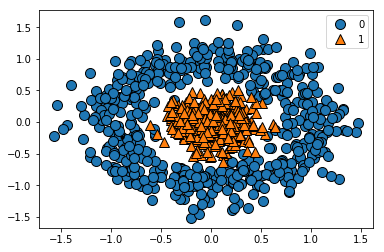

In [11]:
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.plot(X[0,0],X[0,1],'k.')
plt.legend()

b) Split the dataset into train and test-sets.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
display(X_train)
display(X_test)
display(y_train)
display(y_test)

array([[-1.44001217, -0.04466779],
       [ 0.31202098,  0.16662056],
       [-1.47380005, -0.11475042],
       ...,
       [-0.08707465,  0.06593055],
       [-0.39049112,  0.1675812 ],
       [ 0.48384474,  0.40567117]])

array([[-9.73149455e-01,  2.05267690e-01],
       [ 1.75341985e-01, -1.02902202e-02],
       [ 1.75376596e-01,  1.59733163e-01],
       [ 1.15558576e+00,  3.20336140e-01],
       [-1.66662438e-01,  1.42946103e-01],
       [ 1.41184489e-01,  2.95653463e-01],
       [-2.90278739e-01, -1.77010387e-01],
       [-8.14367234e-01,  9.24763361e-01],
       [-3.84136414e-02, -1.53176163e-01],
       [-5.99573819e-02,  1.74678445e-01],
       [ 6.48958638e-01,  1.18809552e+00],
       [ 2.18946272e-01,  9.33250078e-03],
       [ 7.20379042e-01,  4.89354806e-01],
       [-1.64562042e-01, -1.64086613e-01],
       [ 1.01271921e+00,  7.64928489e-01],
       [ 3.96900327e-01,  1.20520433e-02],
       [ 4.95148535e-01, -1.28766168e-01],
       [ 1.05946131e-01,  9.49500973e-02],
       [ 1.00940958e+00,  3.10237267e-01],
       [ 4.56944619e-02, -3.44917375e-01],
       [-1.83103913e-01,  1.52661915e-01],
       [-5.11754719e-01, -7.44061325e-01],
       [ 1.91174361e-01,  1.03172424e-01],
       [ 7.

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

c) Train a logistic regression on the dataset, and compute the classification accuracy. 

In [13]:
Logreg = LogisticRegression().fit(X,y)

print("Accuracy on Training set is: {:.2f}".format(Logreg.score(X_train,y_train)))
print("Accuracy on Test set is: {:.2f}".format(Logreg.score(X_test,y_test)))

Accuracy on Training set is: 0.49
Accuracy on Test set is: 0.56


d) Plot the decision boundary for the logistic regression (e.g. using the `plot_2d_separator`-function from mglearn), and use this to investigate why the algorithm does not give a good result in this case.

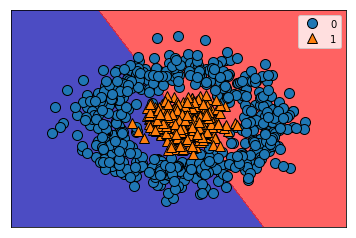

In [14]:
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.plot(X[0,0],X[0,1],'k.')
plt.legend()

plot_2d_separator(Logreg, X_train, fill=True, eps=0.5, alpha=.7)


e) Think of a feature you could add to this dataset to make it linearly separable. 
Add this feature, retrain the logistic regression classifier, and compute the accuracy again. Comment on the result.

Text(0.5, 0, 'feature0 ** 2')

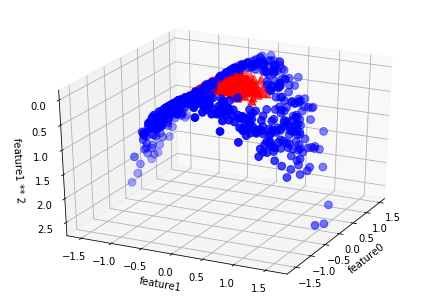

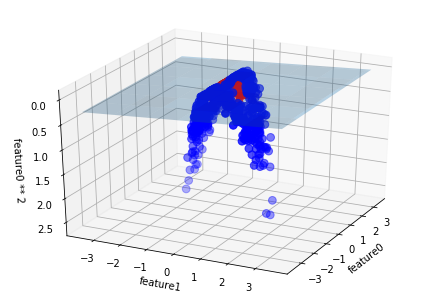

In [15]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
    cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
    cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
    cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
    cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

#Tried adding another dimension as the book, but im not sure this is very beneficial
#This was done by making the Z = x ** y



f) Now, return to the original dataset (without the extra feature), and train a kernelized SVM on the dataset. Compute the accuracy and plot the decision boundary. Compare to your previous results and discuss the differences.

Accuracy on training set: 0.99
Accuracy on test set: 0.99


Text(0, 0.5, 'Feature 1')

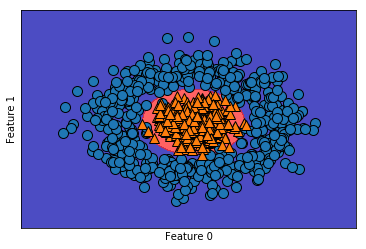

In [16]:
svm = SVC().fit(X,y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plot_2d_separator(svm, X, fill=True, eps=0.5, alpha=.7)
print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test, y_test)))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")




Accuracy on training set: 0.99
Accuracy on test set: 0.98


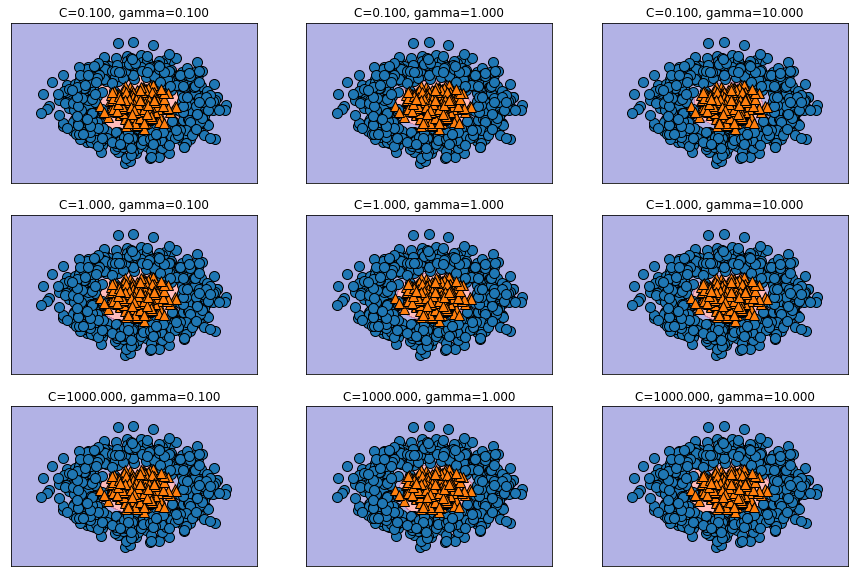

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [0.1, 1, 1000]):
    for a, gamma in zip(ax,[0.1, 1, 10]):
        svm = SVC(C=C, gamma=gamma).fit(X,y)
        mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=a)
        mglearn.plots.plot_2d_separator(svm, X, eps=.5, fill=True, alpha=0.3, ax=a)
        a.set_title("C={:.3f}, gamma={:.3f}".format(C,gamma))
        
svm.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test, y_test)))

# Exercise 2: MNIST

In this exercise, we consider the famous MNIST dataset, which is loaded below. The part of the dataset loaded as `testX` and `testY` will be reserved for testing - i.e. these cannot be used at all during training. 

It might be a good idea to only use part of the dataset (`X` and `Y`) while tuning parameters (in order to reduce the training-time).

In [6]:
%matplotlib inline
import tflearn.datasets.mnist as mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X, y, testX, testY = mnist.load_data()

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


The code-snippet below can be used to see the digits corresponding to individual digits:

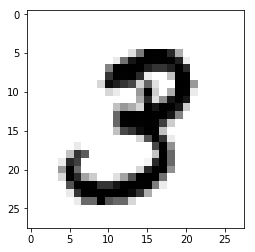

In [7]:
import matplotlib.pyplot as plt
index = 1

plt.imshow(X[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

a) Split the training data into a training and a validation set.

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y)

#It would make sense to do b) before a), since we have redundant steps in splitting the reducedDigits variabel. We could make the reduced digits, and then split the dataset with 2 digits, into test and train.

### Binary classification

b) To begin with, in order to make things a little bit simpler (and faster!), extract from the data a binary subset, that only contains the data for two selected digits:

In [25]:
import numpy as np

reducedDigits_train = np.isin(Y_train, [1,8])
reducedDigits_test = np.isin(Y_test, [1,8])

X_train, Y_train = X_train[reducedDigits_train], Y_train[reducedDigits_train]
X_test, Y_test = X_test[reducedDigits_test], Y_test[reducedDigits_test]

display(Y_train,X_train)

#As we display, we see that the corresponding 1 and 8 Y values, has a 728 long element in the array, with values between 0 and 255 for each pixel

array([8, 8, 8, ..., 1, 1, 1], dtype=uint8)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

c) Learn different SVM models by varying the kernel function. For each configuration,
determine the time it takes to learn the model, and the accuracy on the validation data. *Caution*: for some
configurations, learning here can take a little while (several minutes).

C: 0.1 Kernel: poly Time: 3.9521725177764893Seconds
Accuracy on training subset: 1.00
Accuracy on test subset: 0.99

C: 0.1 Kernel: rbf Time: 82.68972659111023Seconds
Accuracy on training subset: 0.53
Accuracy on test subset: 0.53

C: 0.1 Kernel: sigmoid Time: 86.90286874771118Seconds
Accuracy on training subset: 0.53
Accuracy on test subset: 0.53

C: 1 Kernel: poly Time: 3.412508010864258Seconds
Accuracy on training subset: 1.00
Accuracy on test subset: 0.99

C: 1 Kernel: rbf Time: 215.6913561820984Seconds
Accuracy on training subset: 1.00
Accuracy on test subset: 0.81

C: 1 Kernel: sigmoid Time: 77.12863826751709Seconds
Accuracy on training subset: 0.53
Accuracy on test subset: 0.53

C: 1000 Kernel: poly Time: 3.5632987022399902Seconds
Accuracy on training subset: 1.00
Accuracy on test subset: 0.99

C: 1000 Kernel: rbf Time: 218.5870509147644Seconds
Accuracy on training subset: 1.00
Accuracy on test subset: 0.82

C: 1000 Kernel: sigmoid Time: 78.35971522331238Seconds
Accuracy on trai

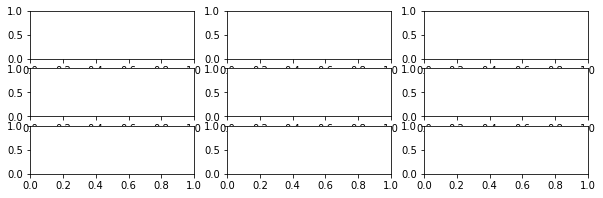

In [36]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import time
import mglearn

fig, axes = plt.subplots(3,3,figsize=(10,3))

for ax, C in zip(axes, [0.1, 1, 1000]):
    for a, kernel in zip(ax,['poly','rbf','sigmoid','precomputed']):
        start = time.time()
        svm = SVC(C=C, gamma=1, kernel=kernel).fit(X_train,Y_train)
        end = time.time()
        #mglearn.discrete_scatter(X_train[:,0],X_train[:,1], Y_train, ax=a)
        #mglearn.plots.plot_2d_separator(svm, X_train_subset, eps=.5, fill=True, alpha=0.3, ax=a)
        #a.set_title("C={:.3f}, gamma={:.3f}".format(C,gamma))
        print("C: " + str(C) + " Kernel: "+ kernel + " Time: " + str(end - start) + "Seconds")
        print("Accuracy on training subset: {:.2f}".format(svm.score(X_train, Y_train)))
        print("Accuracy on test subset: {:.2f}".format(svm.score(X_test,Y_test)))
        print("")

In [12]:
start = time.time()
svm = SVC(kernel='rbf',C=10,gamma=1).fit(X_train,Y_train)
end = time.time()
print("Accuracy obtained with a general SVM: {:.2f}".format(svm.score(X_train,Y_train)))

print("Execution time for the script:", end-start, "seconds")

Accuracy obtained with a general SVM: 1.00
Execution time for the script: 201.47434043884277 seconds


In [13]:
start = time.time()
svm = SVC(kernel='sigmoid',C=10,gamma=1).fit(X_train,Y_train)
end = time.time()
print("Accuracy obtained with a general SVM: {:.2f}".format(svm.score(X_train,Y_train)))

print("Execution time for the script:", end-start, "seconds")

Accuracy obtained with a general SVM: 0.48
Execution time for the script: 79.25784993171692 seconds


In [14]:
start = time.time()
svm = SVC(kernel='sigmoid',C=1,gamma=1).fit(X_train,Y_train)
end = time.time()
print("Accuracy obtained with a general SVM: {:.2f}".format(svm.score(X_train,Y_train)))

print("Execution time for the script:", end-start, "seconds")

Accuracy obtained with a general SVM: 0.54
Execution time for the script: 72.85031628608704 seconds


d) Find a way to extract the misclassified test cases. Inspect some misclassified cases and display them along with their correct label.
Do they correspond to hard to recognize digits (also for the human reader)?  

Accuracy on training subset: 1.00
Accuracy on test subset: 0.99
Prediction: 1
Actual: 8


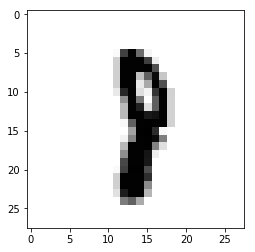

Prediction: 1
Actual: 8


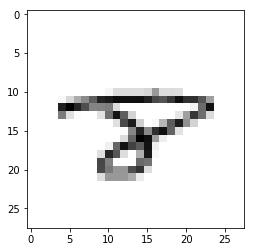

Prediction: 8
Actual: 1


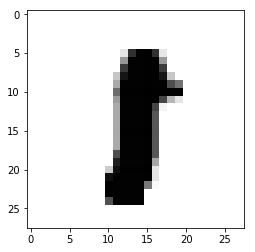

Prediction: 1
Actual: 8


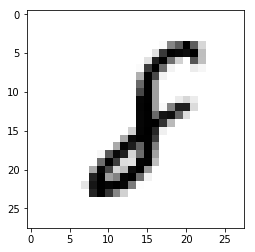

Prediction: 1
Actual: 8


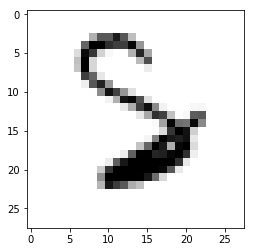

Prediction: 8
Actual: 1


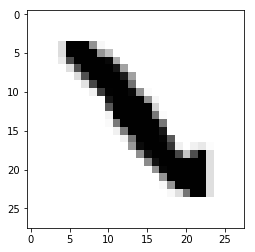

Prediction: 1
Actual: 8


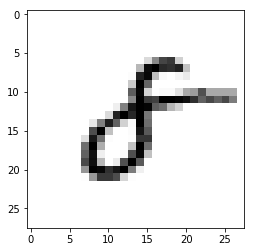

Prediction: 1
Actual: 8


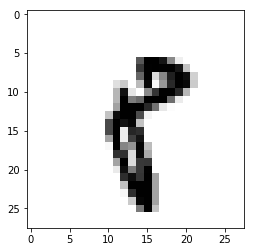

In [41]:
svm = SVC(C=1, gamma=1, kernel='poly').fit(X_train,Y_train)
print("Accuracy on training subset: {:.2f}".format(svm.score(X_train, Y_train)))
print("Accuracy on test subset: {:.2f}".format(svm.score(X_test, Y_test)))
import matplotlib.pyplot as plt


misclassified = np.where(Y_test != svm.predict(X_test))
misclassified = misclassified[0]
predictions = svm.predict(X_test)
for i in range(8):
    print("Prediction: "  + str(predictions[misclassified[i]]))
    print("Actual: " + str(Y_test[misclassified[i]]))
    
    plt.imshow(X_test[misclassified[i]].reshape(28,28),cmap=plt.cm.gray_r)
    plt.show()

e) How do results (time and accuracy) change, depending on whether you consider
an 'easy' binary task (e.g. distinguishing '1' and '0') or a more difficult one (e.g. '4' vs. '5'). This exercise
requires you to make new datasets with different values for 'digit1' and 'digit2'.

C: 1 Kernel: poly Time: 2.669475555419922Seconds
Accuracy on training subset: 1.00
Accuracy on test subset: 1.00

C: 1 Kernel: rbf Time: 27.217586040496826Seconds
Accuracy on training subset: 1.00
Accuracy on test subset: 0.99

Prediction: 1
Actual: 7


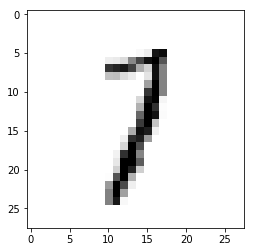

Prediction: 7
Actual: 1


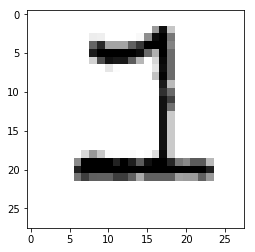

Prediction: 7
Actual: 1


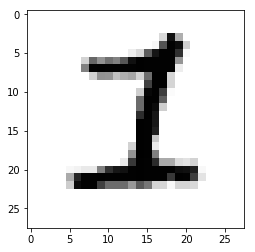

Prediction: 7
Actual: 1


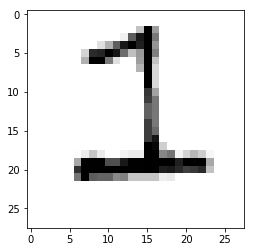

Prediction: 7
Actual: 1


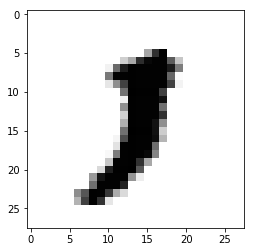

Prediction: 7
Actual: 1


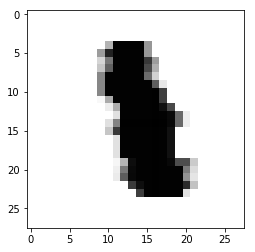

Prediction: 7
Actual: 1


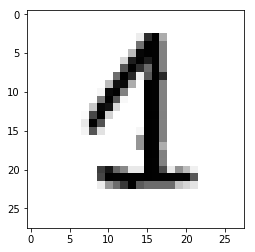

Prediction: 7
Actual: 1


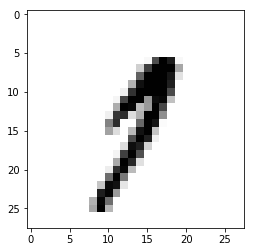

In [46]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, y)

reducedDigits_train2 = np.isin(Y_train2, [1,7])
reducedDigits_test2 = np.isin(Y_test2, [1,7])

X_train2, Y_train2 = X_train2[reducedDigits_train2], Y_train2[reducedDigits_train2]
X_test2, Y_test2 = X_test2[reducedDigits_test2], Y_test2[reducedDigits_test2]


for ax, C in zip(axes, [1]):
    for a, kernel in zip(ax,['poly','rbf']):
        start = time.time()
        svm = SVC(C=C, gamma=0.1, kernel=kernel).fit(X_train2,Y_train2)
        end = time.time()
        #mglearn.discrete_scatter(X_train[:,0],X_train[:,1], Y_train, ax=a)
        #mglearn.plots.plot_2d_separator(svm, X_train_subset, eps=.5, fill=True, alpha=0.3, ax=a)
        #a.set_title("C={:.3f}, gamma={:.3f}".format(C,gamma))
        print("C: " + str(C) + " Kernel: "+ kernel + " Time: " + str(end - start) + "Seconds")
        print("Accuracy on training subset: {:.2f}".format(svm.score(X_train2, Y_train2)))
        print("Accuracy on test subset: {:.2f}".format(svm.score(X_test2,Y_test2)))
        print("")
        
        
        
        
misclassified2 = np.where(Y_test2 != svm.predict(X_test2))
misclassified2 = misclassified2[0]
predictions = svm.predict(X_test2)
for i in range(8):
    print("Prediction: "  + str(predictions[misclassified2[i]]))
    print("Actual: " + str(Y_test2[misclassified2[i]]))
    
    plt.imshow(X_test2[misclassified2[i]].reshape(28,28),cmap=plt.cm.gray_r)
    plt.show()


### Multiclass classification

f) [Discussion only] Explain how a binary classifier, such as an SVM, can be applied to a multiclass classification problem, such as recognizing all 10 digits in the MNIST dataset.

There is a binary classifier for each class, in the model (in this case 10 different).
Each prediciton will consist of a binary decision between these 10 different classes, meaning that there either it is 


g) From the binary classification exercise above, identify a good configuration that gives a reasonable combination
of accuracy and runtime. Use this configuration to perform a full classification of the 10 classes in the
original dataset. Report the accuracy obtained on the test data.

In [2]:
#The rbf kernel radial basis function, looks at the actual values of each pixel
#the poly kernel, will make a polonomial of the pixel mapping, and look at combinations.
#As we see in the above exercises, we identify poly kernel as being fastest and most reliable.
#This makes sence, since mapping a polonomial model of the data in black/white, is granted good towards the mnist dataset

start = time.time()
svm = SVC(kernel='poly',C=1,gamma=1).fit(X,y)
end = time.time()
print("Accuracy obtained with a general SVM: {:.2f}".format(svm.score(X,y)))


NameError: name 'time' is not defined

# Exercise 3: Regression with random forest

For this exercise we will be using the famous nycflights dataset.

So far, we have only considered how to use SVMs and decision trees (and, by extension, random forests) for classification. However, both algorithms can also be used for regression tasks, as we will see in the exercises below.

### Preprocessing

a) Load the data as a pandas dataframe and display the first 5 rows of the dataset. Remove the columns `'carrier'`,`'tailnum'`,`'flight'`,`'origin'`, and `'dest'`.

In [24]:
import pandas as pd
nycflights = pd.read_csv("C:/exercise/flights.csv")
print(nycflights)
flights = nycflights.drop(columns=['carrier','tailnum','flight','origin','dest'])
print("flights:")
print(flights)

        Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
0                1  2013      1    1     517.0        2.0     830.0   
1                2  2013      1    1     533.0        4.0     850.0   
2                3  2013      1    1     542.0        2.0     923.0   
3                4  2013      1    1     544.0       -1.0    1004.0   
4                5  2013      1    1     554.0       -6.0     812.0   
5                6  2013      1    1     554.0       -4.0     740.0   
6                7  2013      1    1     555.0       -5.0     913.0   
7                8  2013      1    1     557.0       -3.0     709.0   
8                9  2013      1    1     557.0       -3.0     838.0   
9               10  2013      1    1     558.0       -2.0     753.0   
10              11  2013      1    1     558.0       -2.0     849.0   
11              12  2013      1    1     558.0       -2.0     853.0   
12              13  2013      1    1     558.0       -2.0     924.0   
13    

In [25]:
flights['arr_delay'].describe()


count    327346.000000
mean          6.895377
std          44.633292
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
Name: arr_delay, dtype: float64

b) Plot the distributions for all variables (hint: use the `hist` method for the dataframe). Consider if you want to transform any of the variables, i.e. using a logarithmic transformation. Explain your choices.

Text(0, 0.5, 'Flights')

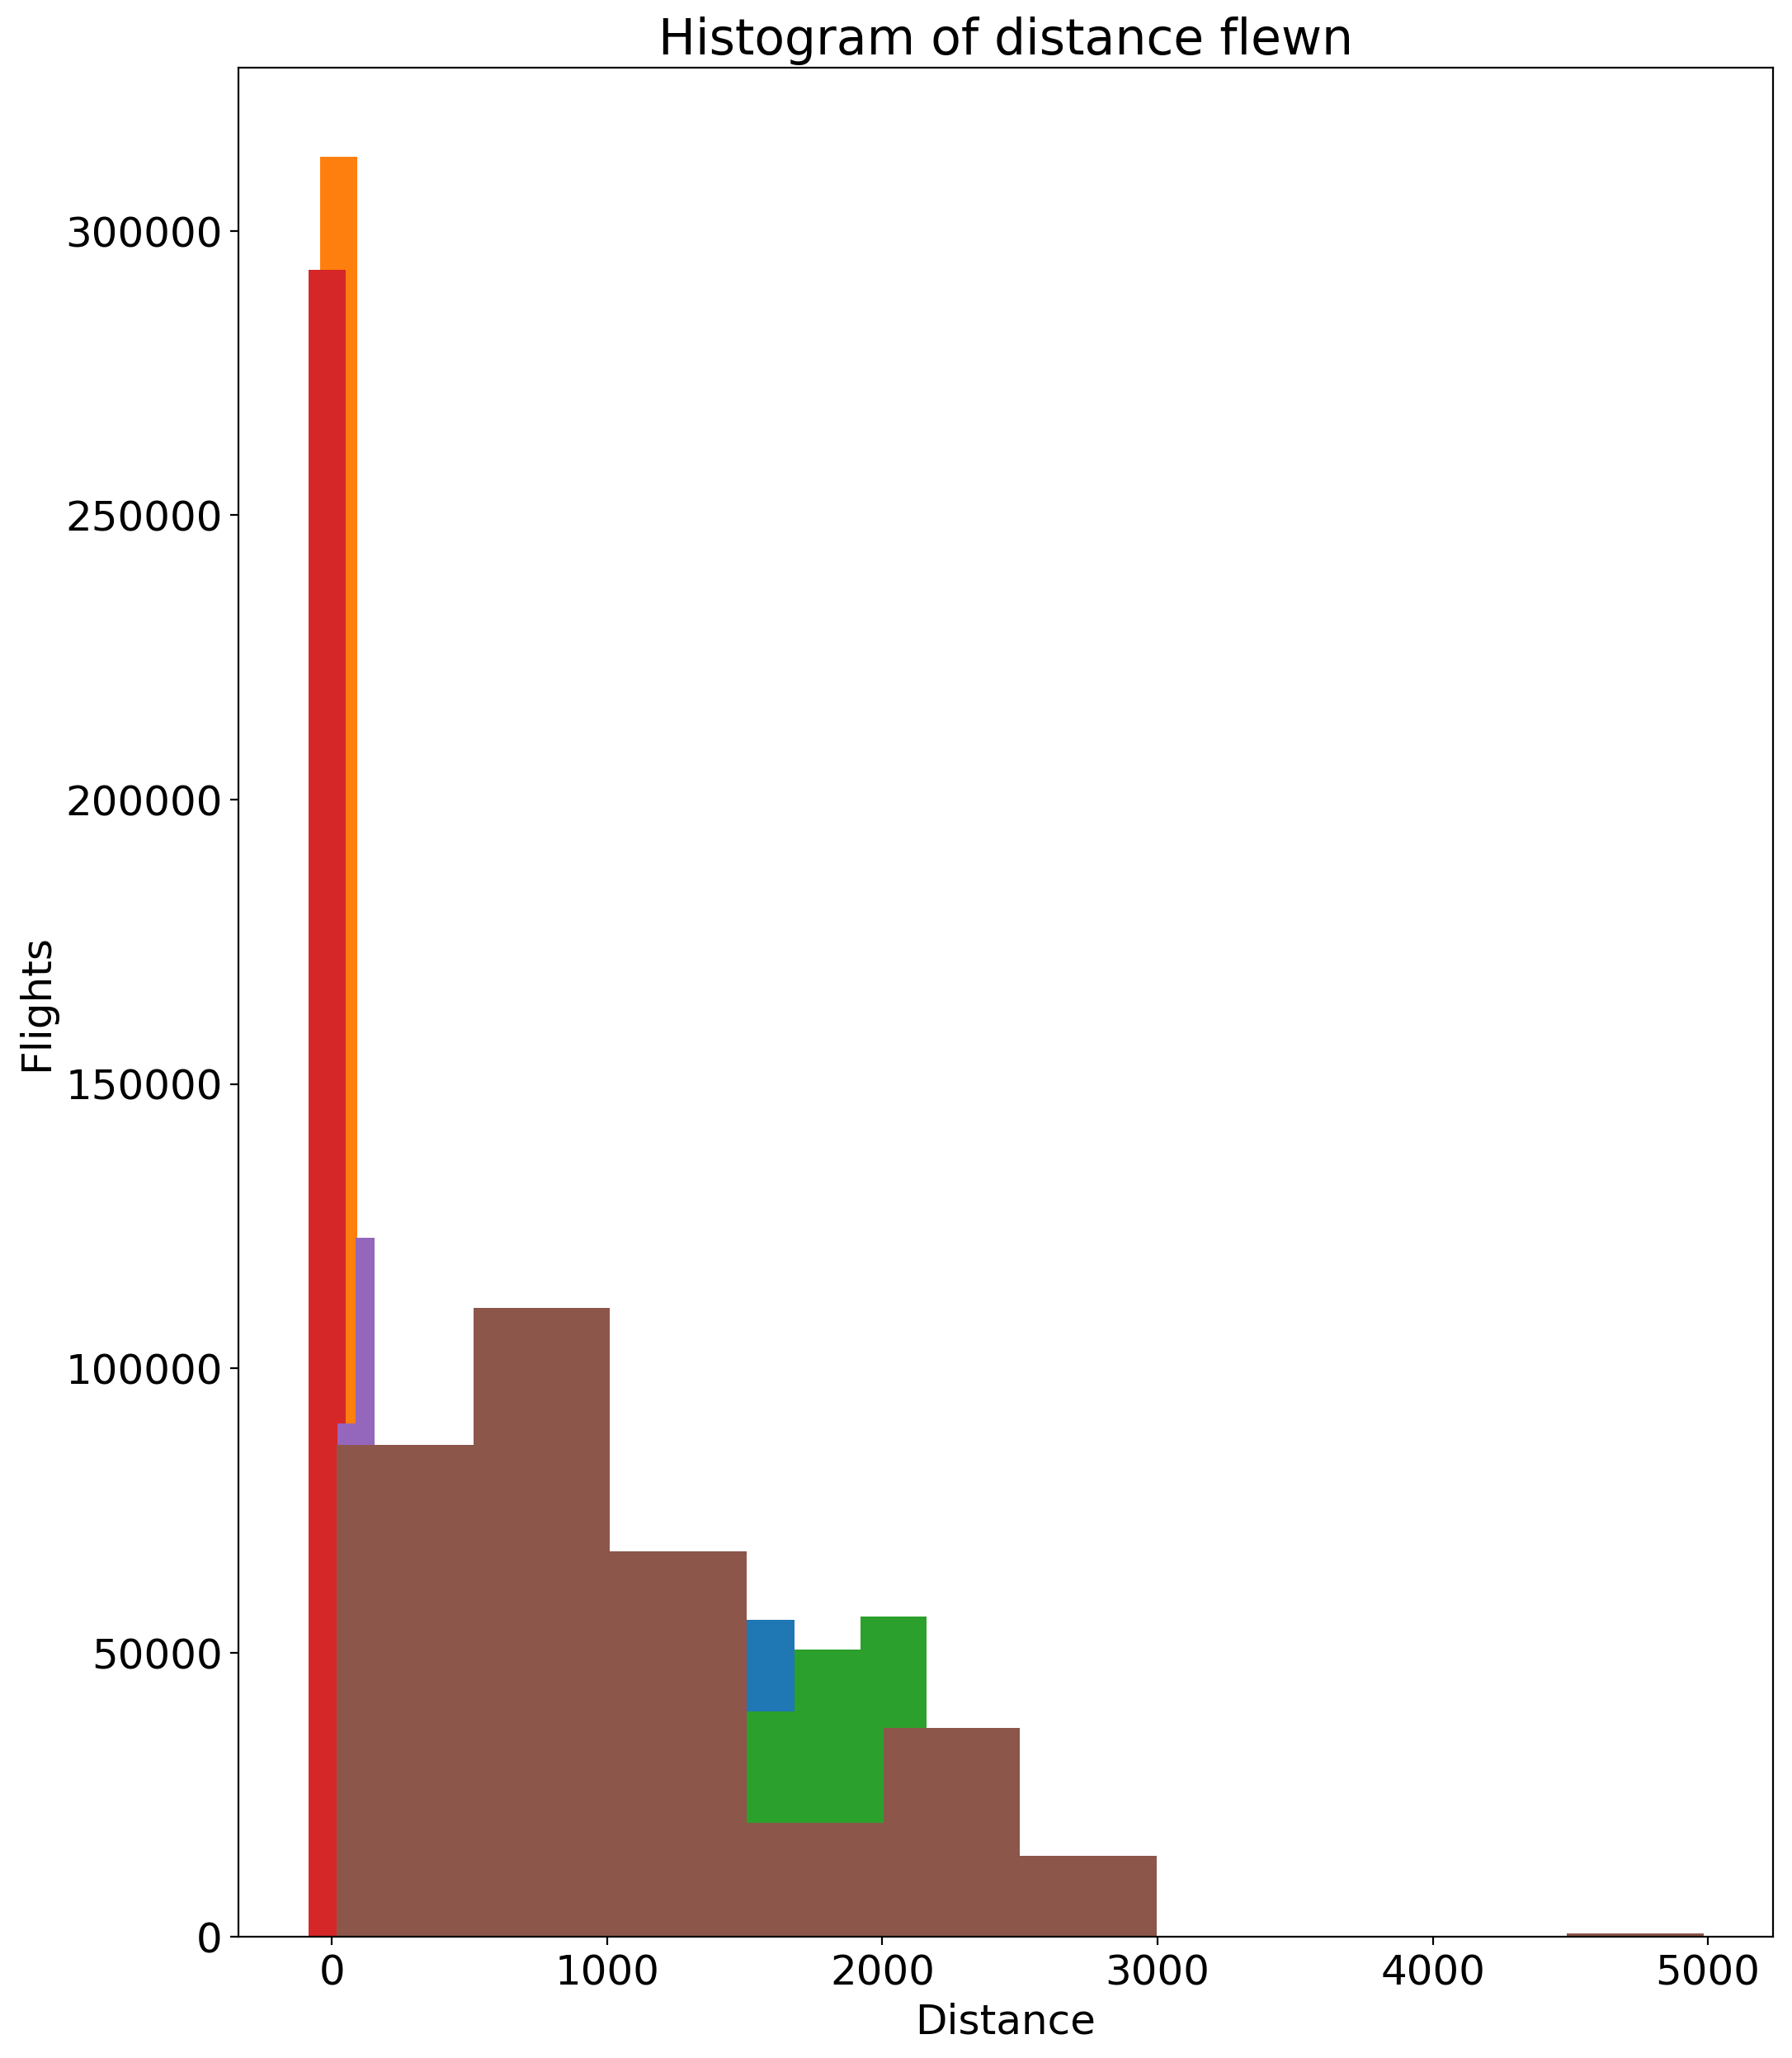

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200
from IPython.core.pylabtools import figsize

dep_time = flights['dep_time']
dep_delay = flights['dep_delay']
arr_time = flights['arr_time']
arr_delay = flights['arr_delay']
air_time = flights['air_time']
distance = flights['distance']

figsize(12, 15)


plt.hist(dep_time)
plt.title('Histogram of Depature Time')
plt.xlabel('Time')
plt.ylabel('Flights')

plt.hist(dep_delay)
plt.title('Histogram of Depature Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

plt.hist(arr_time)
plt.title('Histogram of Arrival time')
plt.xlabel('Arrival')
plt.ylabel('Flights')

plt.hist(arr_delay)
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

plt.hist(air_time)
plt.title('Histogram of time in the air')
plt.xlabel('Time')
plt.ylabel('Flights')

plt.hist(distance)
plt.title('Histogram of distance flewn')
plt.xlabel('Distance')
plt.ylabel('Flights')
#https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0



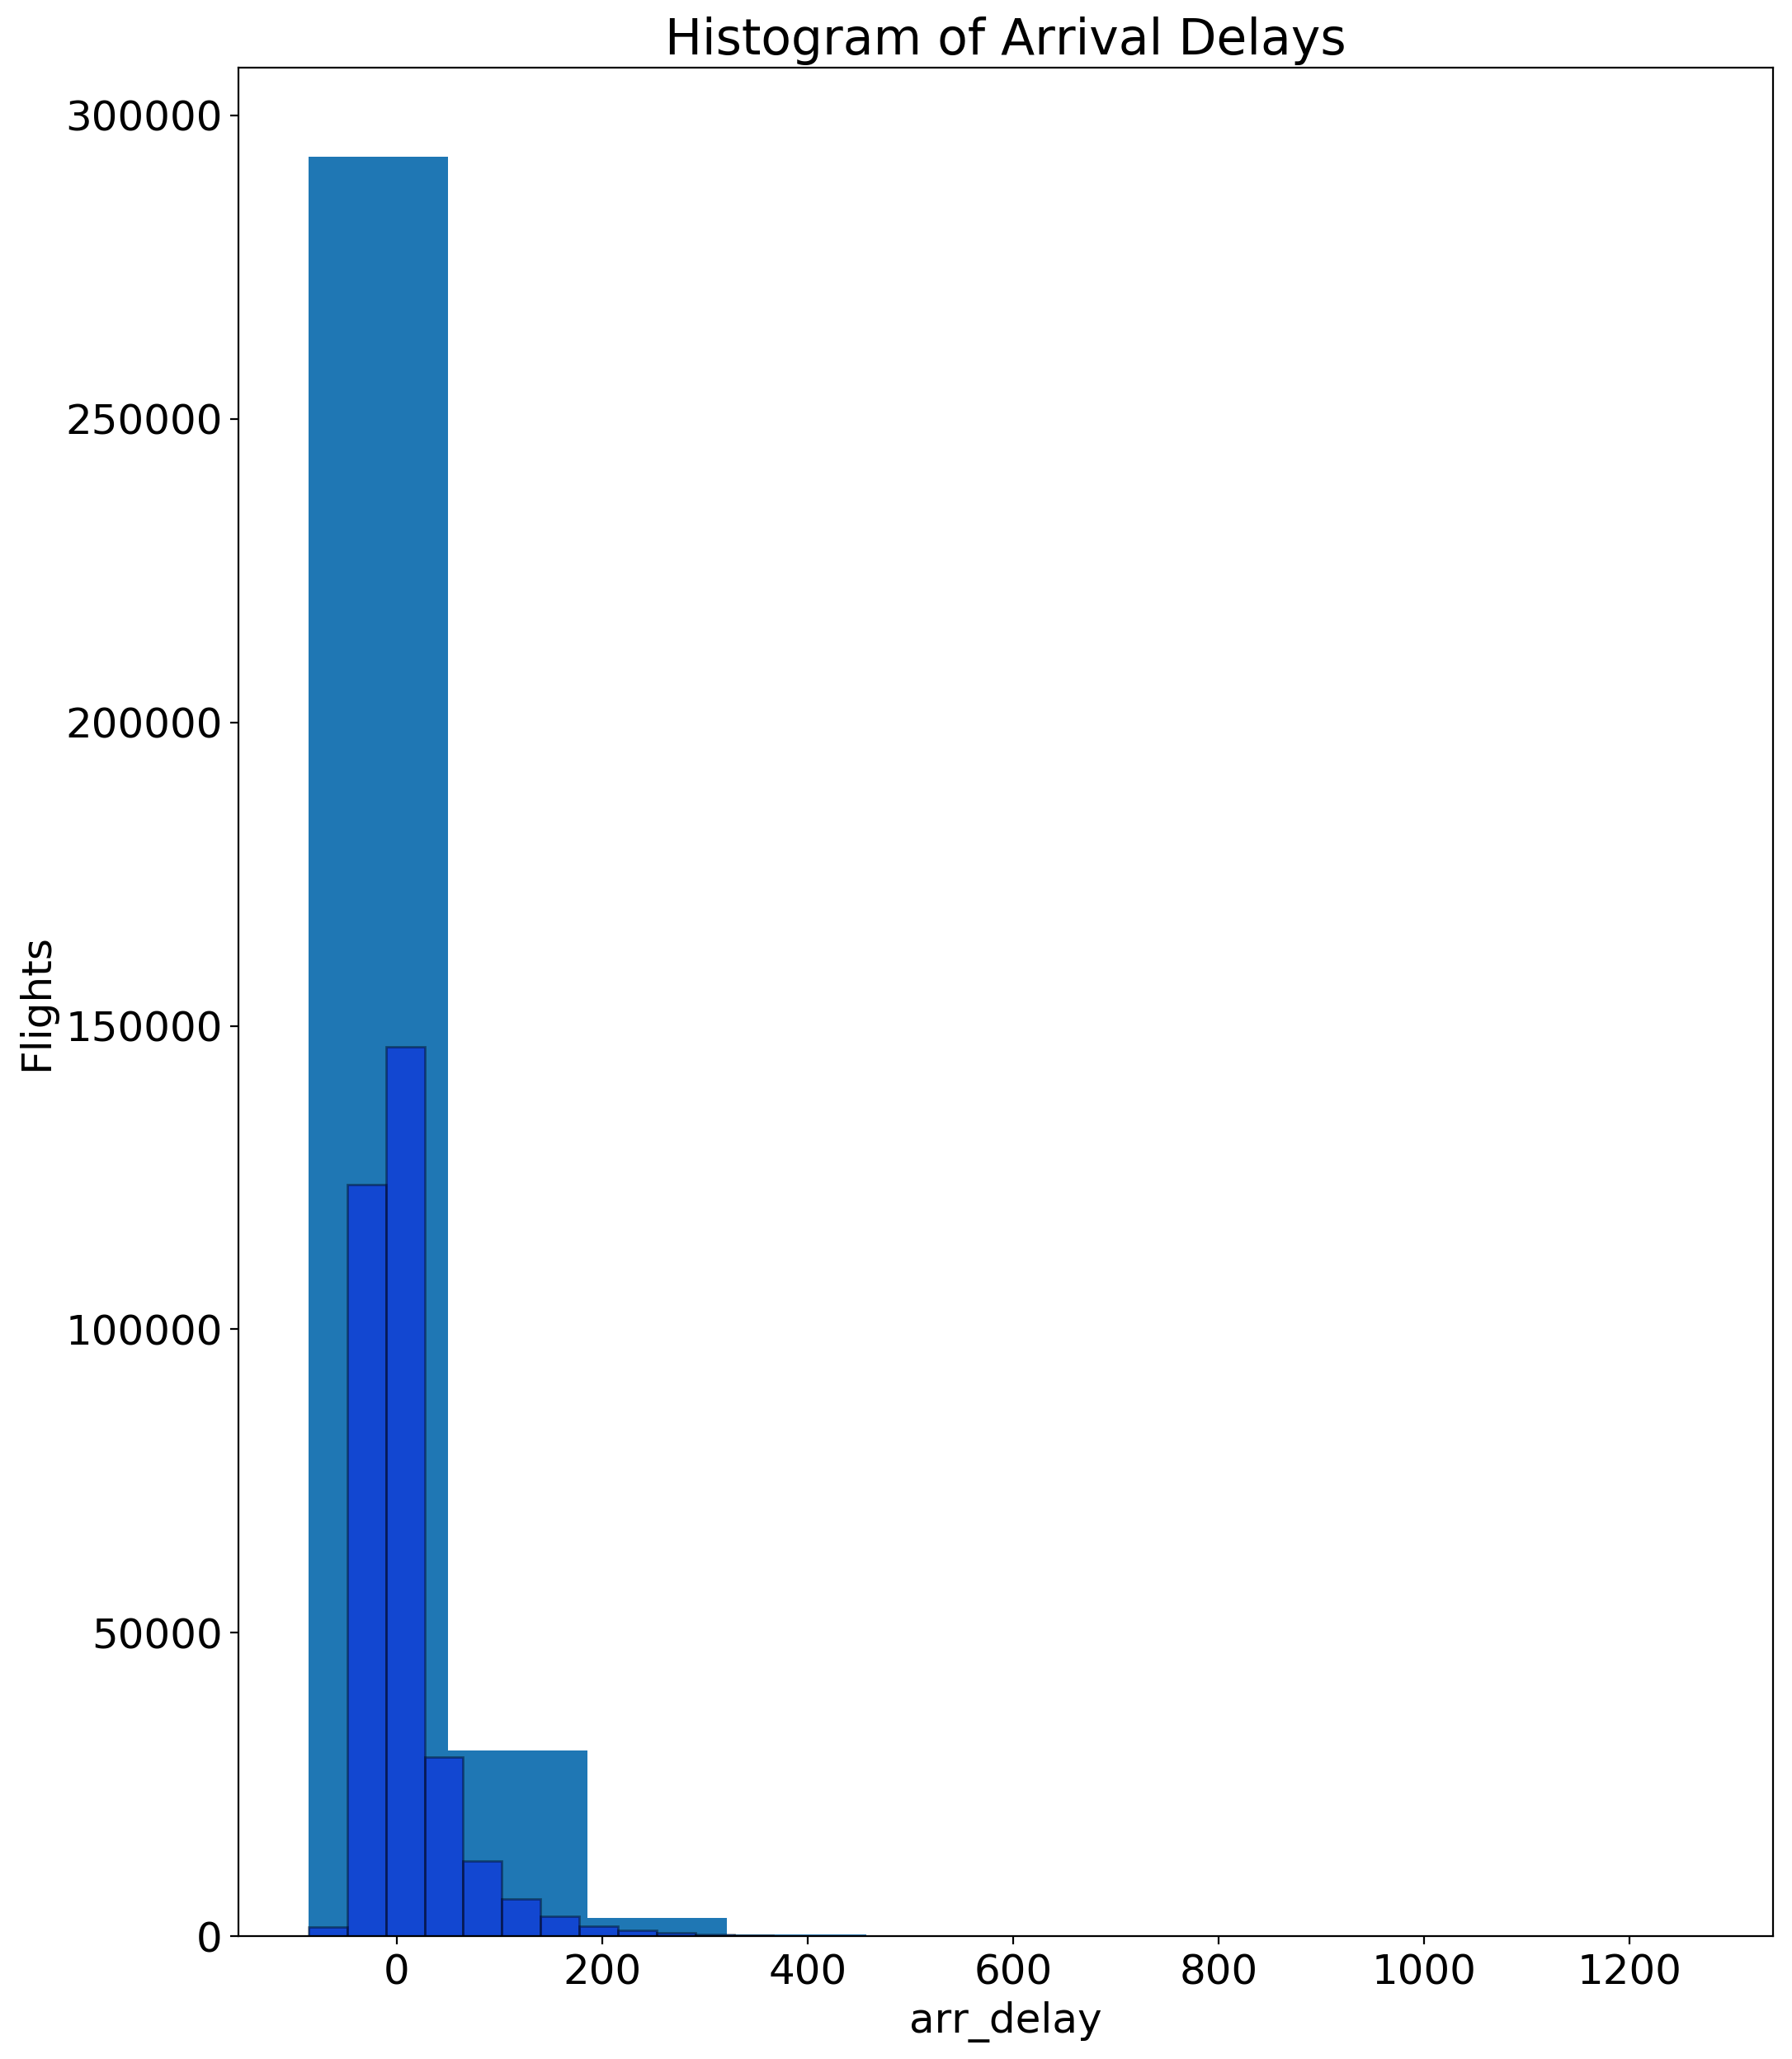

In [27]:
import seaborn as sns

plt.hist(arr_delay)
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Text(0, 0.5, 'Flights')

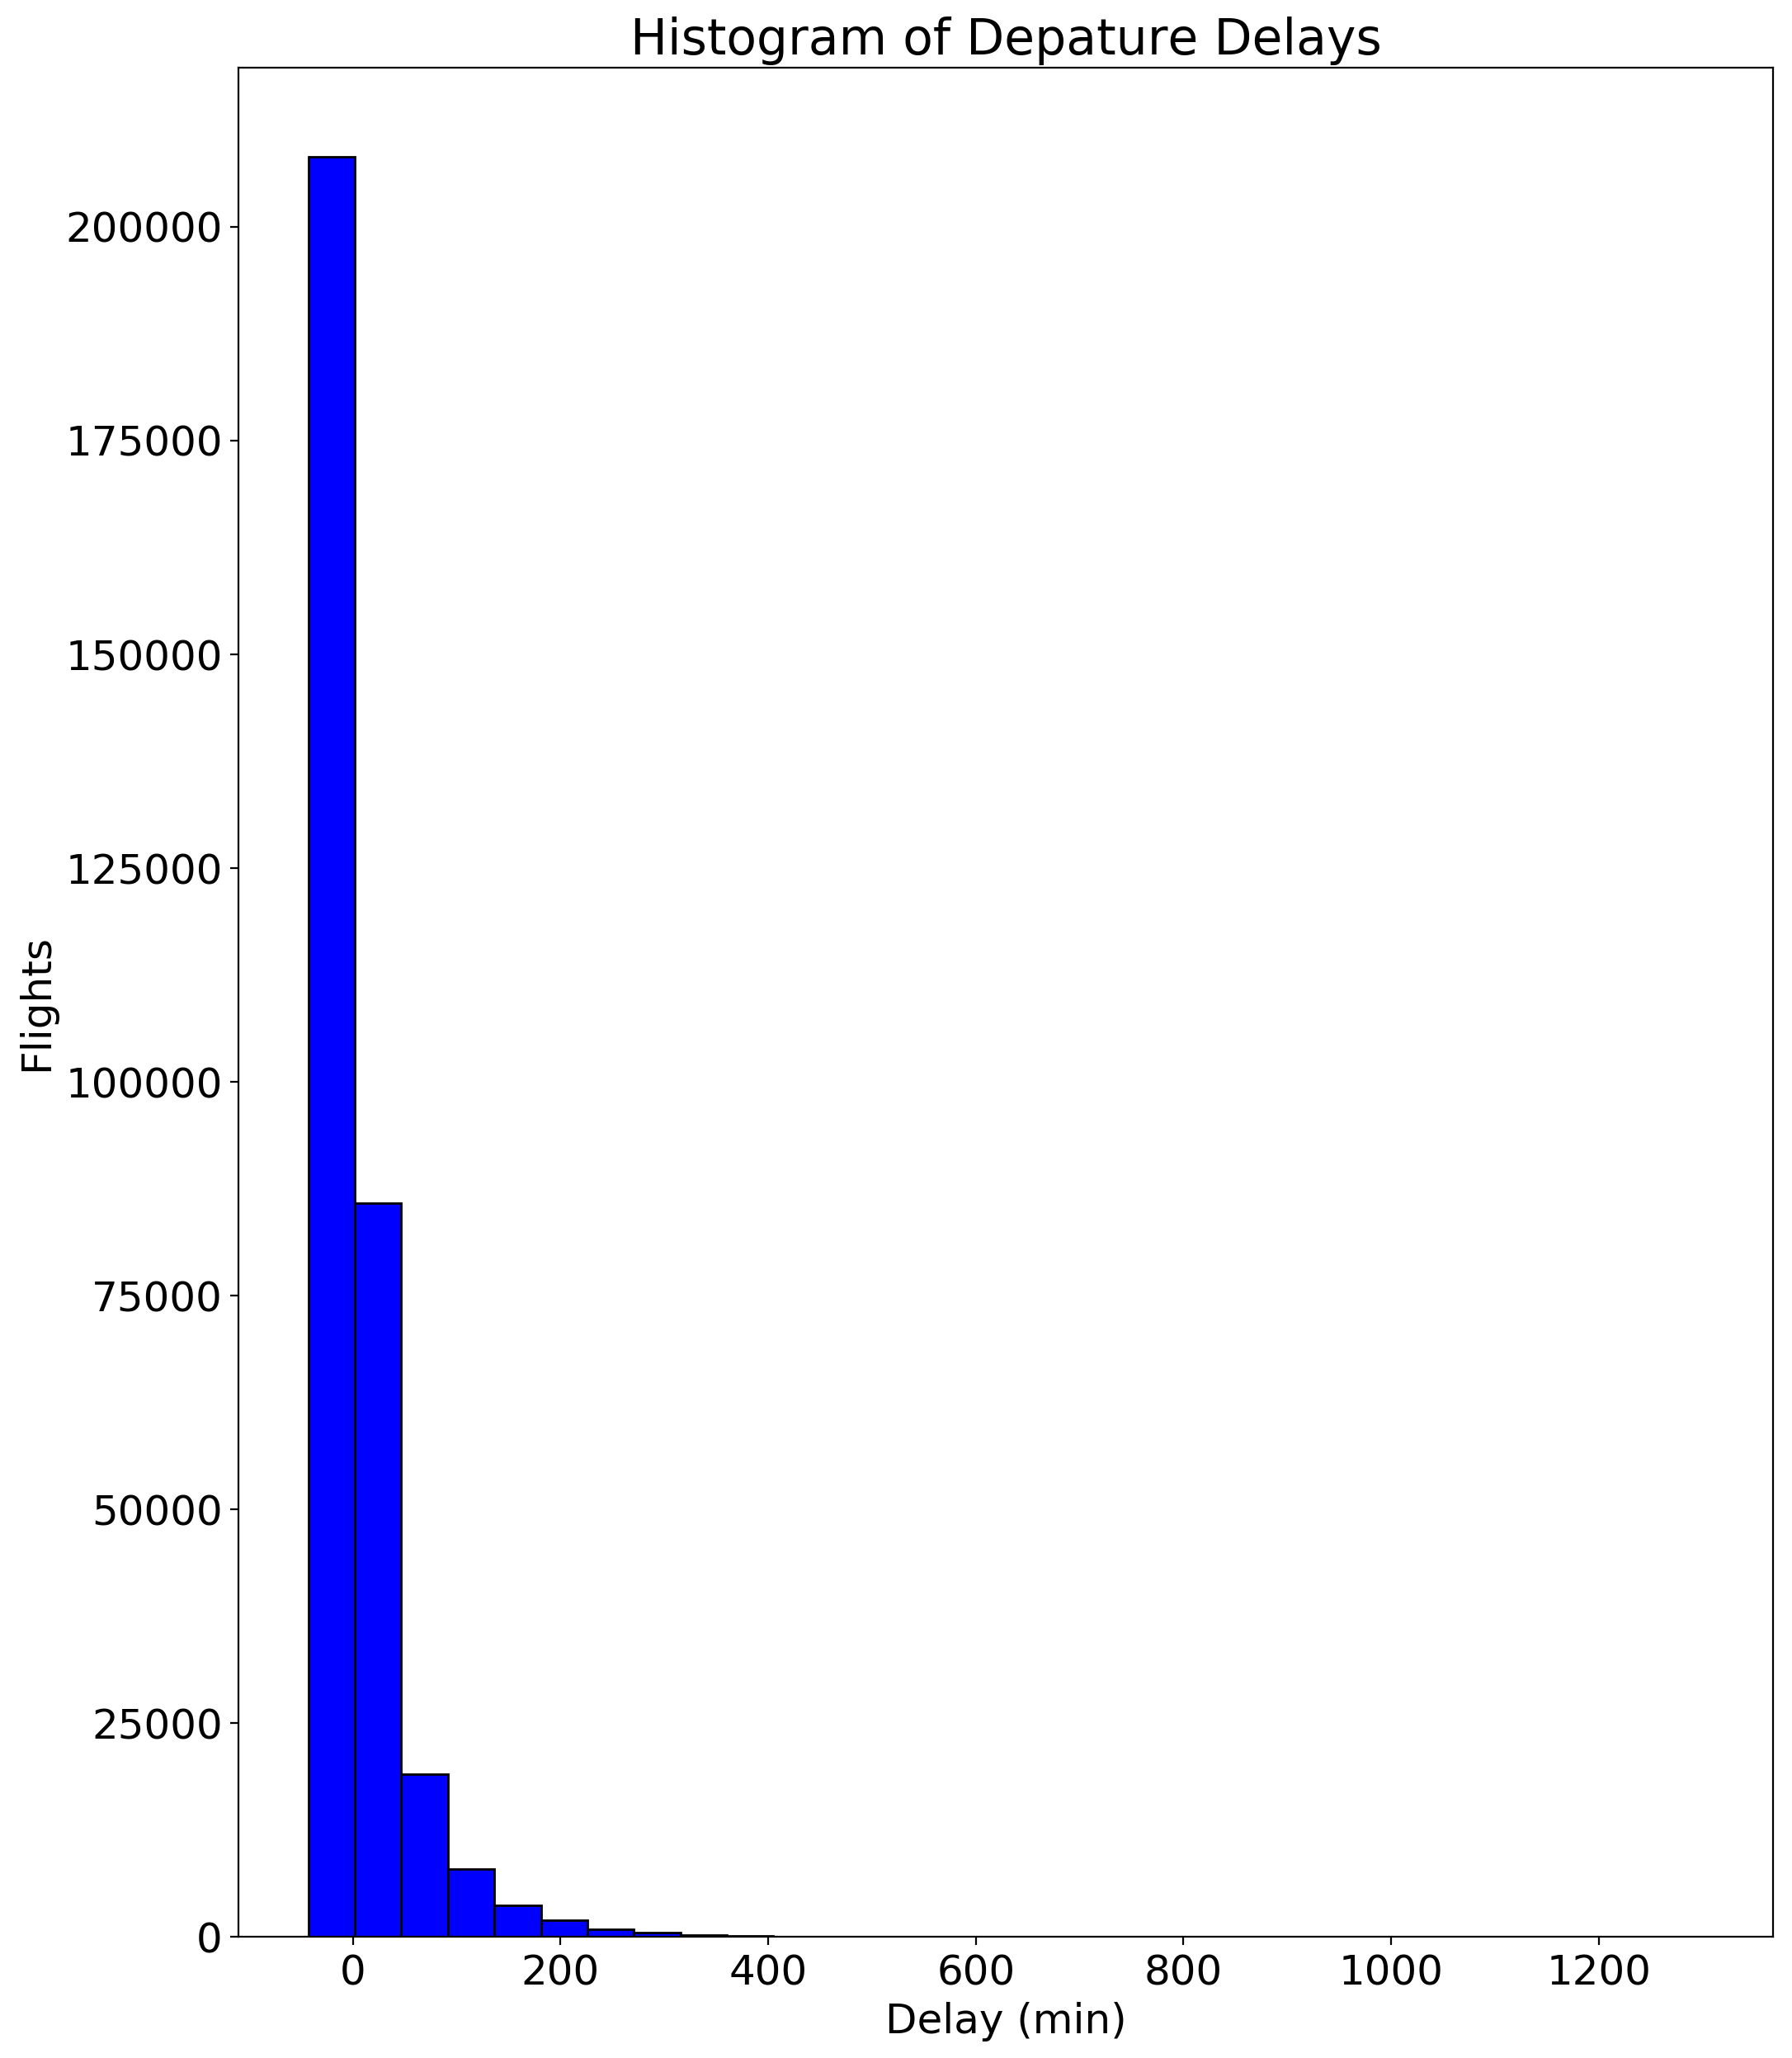

In [28]:
N_points = 100000
n_bins = 20


plt.hist(flights['dep_delay'], bins=30, color = 'blue', edgecolor = 'black')
plt.title('Histogram of Depature Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')


c) Handle any nan-values in the dataset, and normalize all relevant variables. Are there any categorical variables? If so, create dummy variables for these.

In [29]:
#Look at Hans.ipynb
print(flights.shape)
flights.dropna(inplace=True)
print(flights.shape)


from sklearn import preprocessing

#creating dummy data
dep_delay_dummies = pd.get_dummies(dep_delay)
arr_delay_dummies = pd.get_dummies(arr_delay)

print(dep_delay_dummies)
print(arr_delay_dummies)


(336776, 12)
(327346, 12)
        -43.0    -33.0    -32.0    -30.0    -27.0    -26.0    -25.0    \
0             0        0        0        0        0        0        0   
1             0        0        0        0        0        0        0   
2             0        0        0        0        0        0        0   
3             0        0        0        0        0        0        0   
4             0        0        0        0        0        0        0   
5             0        0        0        0        0        0        0   
6             0        0        0        0        0        0        0   
7             0        0        0        0        0        0        0   
8             0        0        0        0        0        0        0   
9             0        0        0        0        0        0        0   
10            0        0        0        0        0        0        0   
11            0        0        0        0        0        0        0   
12            0        0 

d) In the following, we are going to determine which factors cause departure time delays, and try to predict the length of these delays. However, for several departures, a *negative* delay have been reported. How do you interpret a negative delay? Consider if you want to modify the negative delays in some way. 

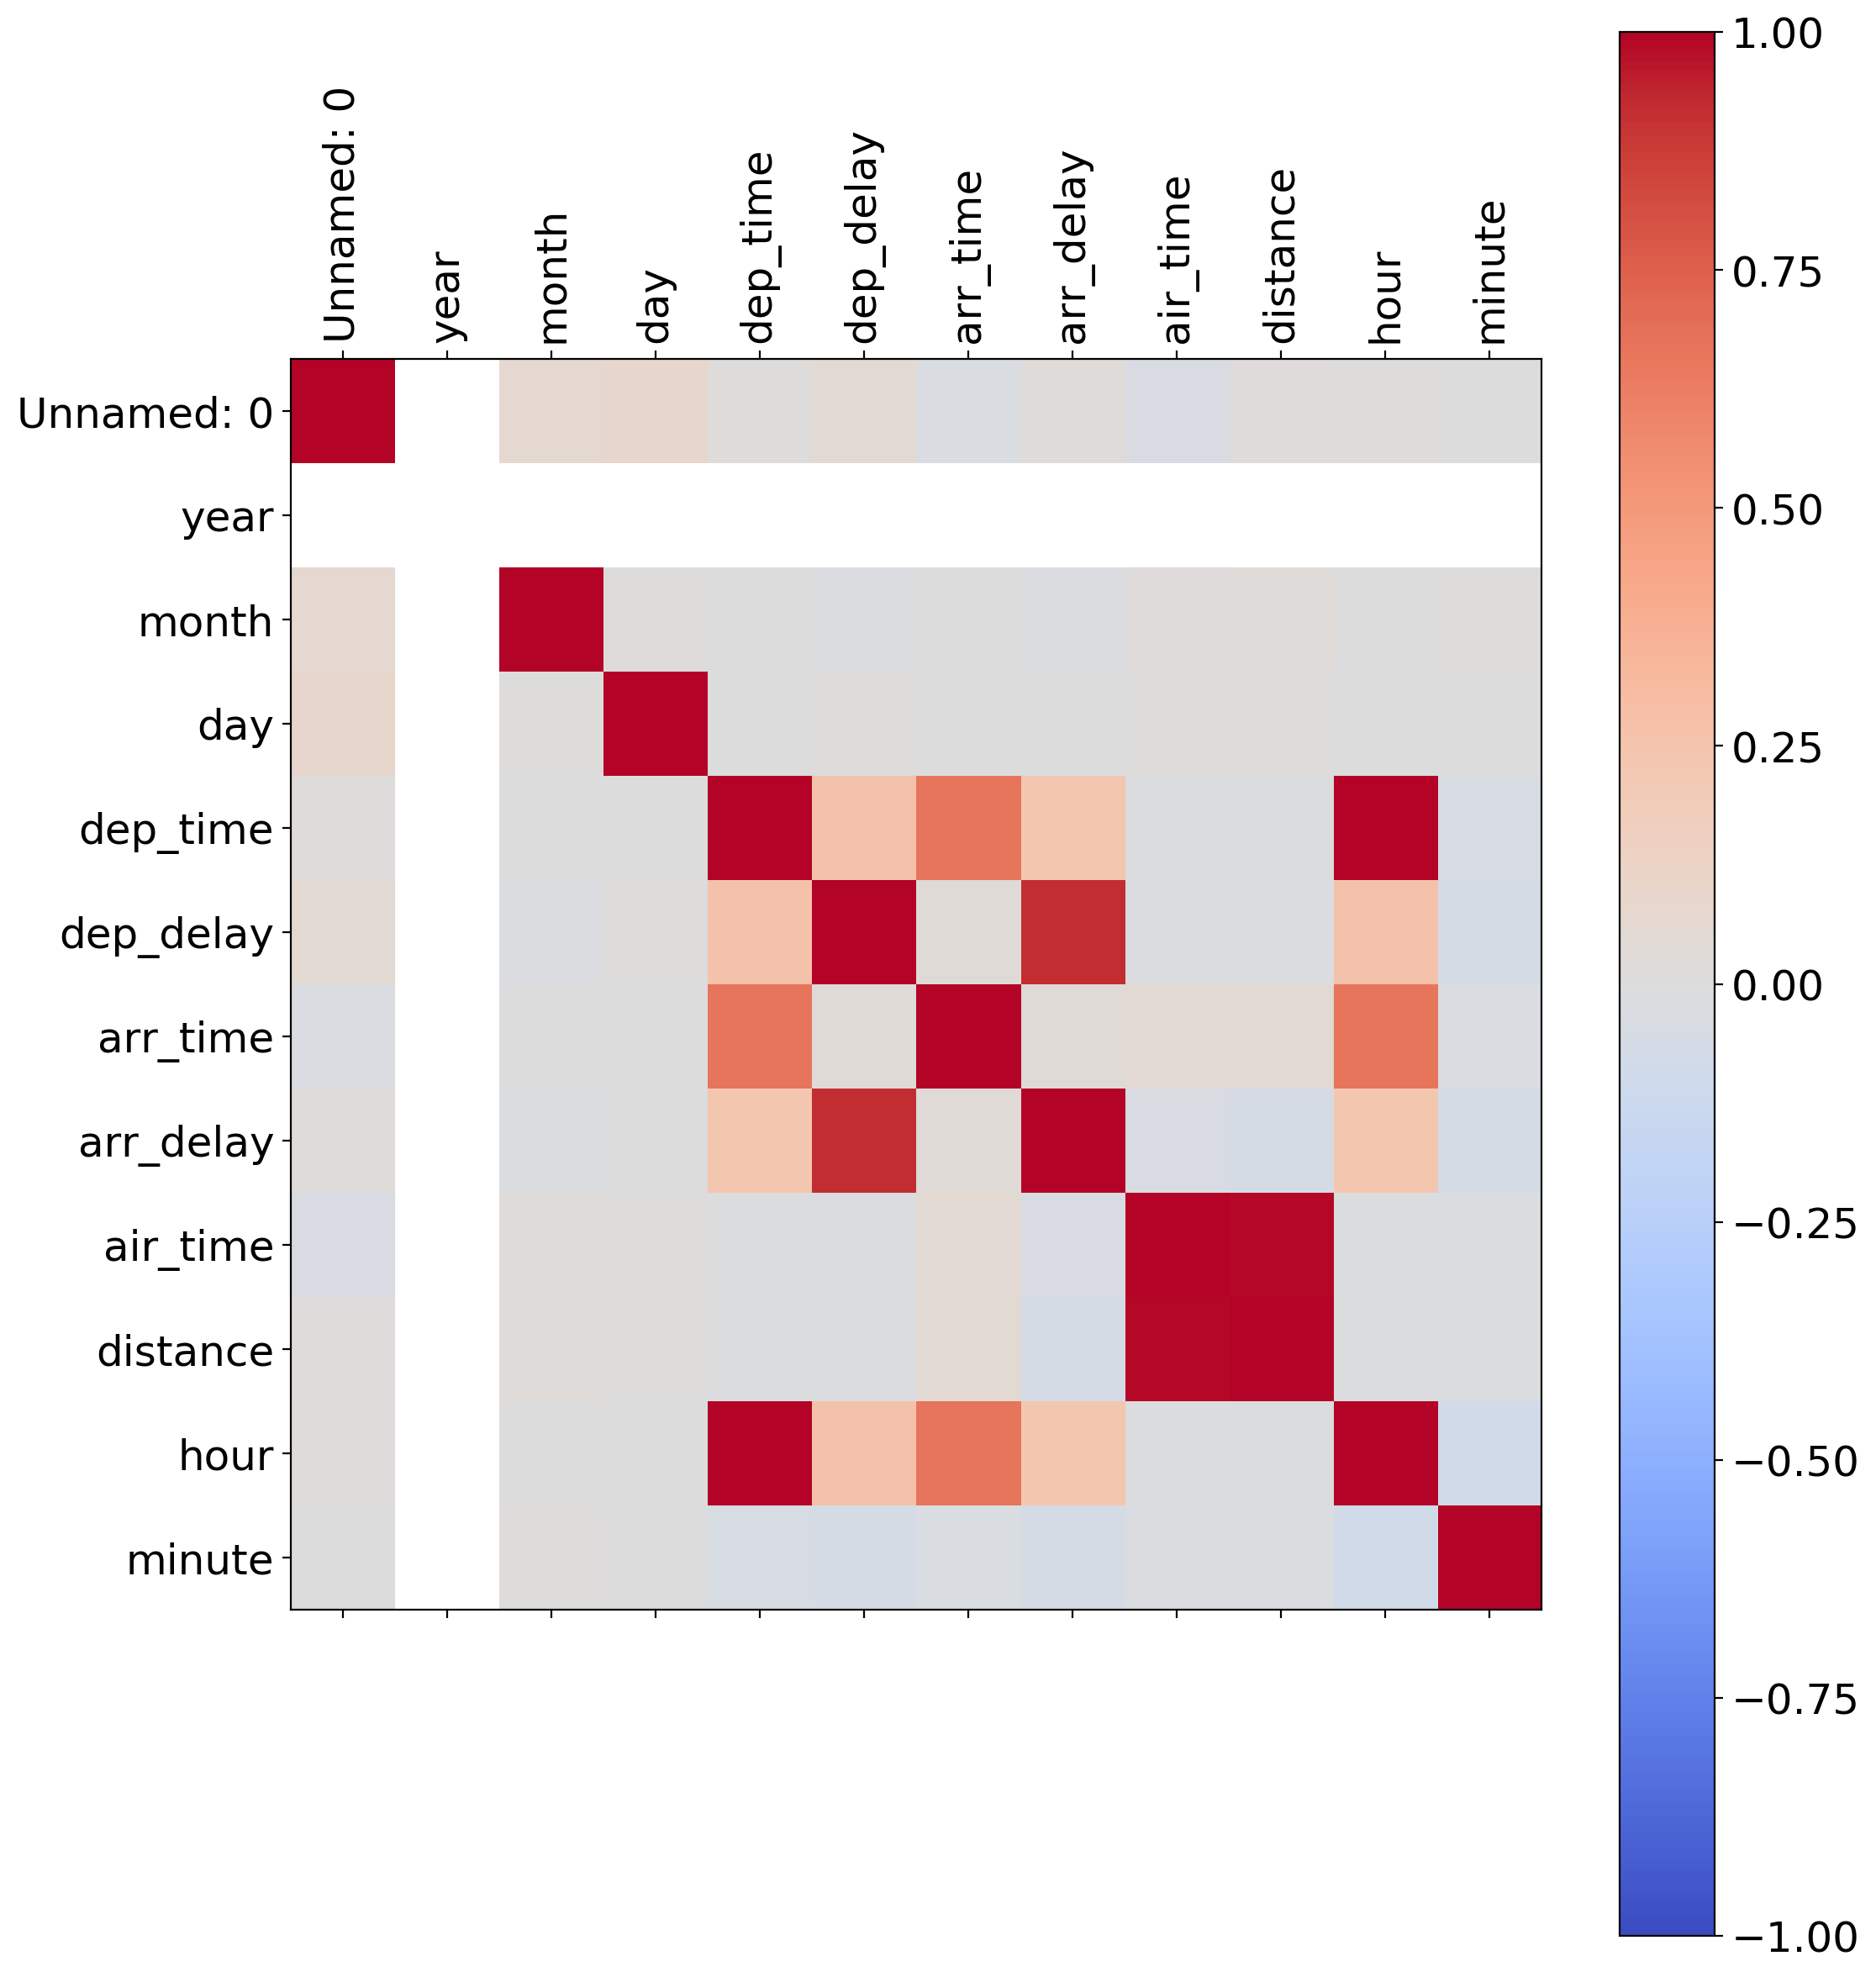

In [30]:
#Arrival time delays must cause departure delays.
#A negative delay means the plane arrived faster than expected?

corr = flights.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(flights.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(flights.columns)
ax.set_yticklabels(flights.columns)
plt.show()

#how to determine length?

### Regression analysis: Predicting departure time delays

e) Extract the features and the target variable (in this case the departure time delays) from the dataframe. Split the dataset into test and train sets (technically, we ought to have done this before preprocessing. For the sake of simplicity, we do not conform to this best practice in this exercise).

In [8]:
from sklearn.model_selection import train_test_split

y = flights['dep_delay']
X = flights.drop('dep_delay',axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =  90)

print(x_train, y_train)


NameError: name 'x_train' is not defined

f) Train a decision tree regressor for predicting departure time delays (you might want to experiment with a few different values of the hyperparameters to avoid too much overfitting). Plot the tree, and explain how decision trees can be used for regression analyses.

In [31]:
#Now, let's try to train a decision tree on the data:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
forest = DecisionTreeRegressor()
forest.fit(X_train, y_train)

forestClas = DecisionTreeClassifier()
forestClas.fit(X_train, y_train)

print("Accuracy on training data Regressor = {}".format(forest.score(X_train, y_train)))
print("Accuracy on testing data Regressor = {}\n".format(forest.score(X_test, y_test)))
print("Accuracy on training data Classifier = {}".format(forestClas.score(X_train, y_train)))
print("Accuracy on testing data Classifier = {}\n".format(forestClas.score(X_test, y_test)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

>Classification trees have dependent variables that are categorical and unordered. Regression trees have dependent variables that are continuous values or ordered whole values. Regression means to predict the output value using training data. Classification means to group the output into a class.<

g) Do a regression analysis as the one above, but using a random forest instead of a single decision tree. Use a grid-search to determine a good set of hyperparameters. When you have found the best model, score your model on the test set. Comment on the result. 

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Random search allowed us to narrow down the range for each hyperparameter.
from sklearn.model_selection import RandomizedSearchCV
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

randoForest = RandomForestRegressor()
randoForest.fit(X_train,y_train)

print('Parameters currently in use:\n')
print(randoForest.get_params())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

randoForest_randomSearch = RandomizedSearchCV(estimator = randoForest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

randoForest_randomSearch.fit(X_train, y_train)

randoForest_randomSearch.best_params_

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

C:\Users\Alien\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

h) Plot the feature importances determined by the tree. Which feature is the most important? Do you have any idea as to why? Remove any features which cannot be used to predict departure time delays in any meaningful way, and redo the analysis. Comment on your results.

In [108]:
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

C:\Users\Alien\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MemoryError: could not allocate 2206203904 bytes

### Regression analysis: Predicting arrival time delays

In the last part of the exercise, we are going to try to predict arrival time delays as a function of departure time delays - it might be of interest to know how large a delay one should expect after the plane has departed from the airport. 

i) Train a decision tree or random forest regressor and an OLS to the dataset, and see how well arrival time delay. can be predicted based on departure time delay. 

In [ ]:
randoForest2 = RandomForestRegressor()

y_delay = flights['arr_delay']
X_delay = flights['dep_delay']

X_delay_train, X_delay_test, y_delay_train, y_delay_test = train_test_split(X_delay, y_delay, random_state =  90)

randoForest2.fit(X_delay_train,y_delay_train)

print("Accuracy on training data Regressor = {}".format(randoForest2.score(X_delay_train, y_delay_train)))
print("Accuracy on testing data Regressor = {}\n".format(randoForest2.score(X_delay_test, y_delay_test)))

#Ordinary Least Squares (OLS)
from sklearn.linear_model import LinearRegression
#Linear regression (aka ordinary least squares) Page 47 in introduction to Machine Learning with Python

plt.scatter(X_delay, y_delay)
plt.show()

LinReg = LinearRegression()
linReg.fit(X_delay,y_delay)
y_delay_predicted = LinReg.predict(X_delay)
plt.plot(X_delay, y_predicted, color='r')

print("Accuracy on training Linear Regressor = {}".format(LinReg.score(X_delay_train, y_delay_train)))
print("Accuracy on testing Linear Regressor = {}\n".format(LinReg.score(X_delay_test, y_delay_test)))


j) Plot the arrival time delays as a function of the departure time delay, and show the predictions from each of the two regressors.

In [ ]:
expected_Delay = y_delay * X_delay

print("Accuracy on training data Regressor = {}".format(randoForest2.score(expected_Delay, y_delay_train)))
print("Accuracy on training Linear Regressor = {}".format(LinReg.score(expected_Delay, y_delay_train)))

k) Based on the results obtained above, make a plot that extrapolates a little bit in order to predict delays slightly larger than the largest delay found in the dataset. Which model do you think gives the most trustworthy extrapolation? 

In [ ]:
#https://peteris.rocks/blog/extrapolate-lines-with-numpy-polyfit/

l) Hopefully you found that it is possible to predict arrival time delays quite confidently from departure time delays. See if you can improve these predictions by including some (or all) of the other features. You are encouraged to try out several different machine learning algorithms.

In [ ]:
randomForest = RandomForestRegressor()
decisionTree = DecisionTreeRegressor()
linearReg = LinearRegression()

y = flights['dep_delay']
X = flights.drop('dep_delay',axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =  90)

randomForest.fit(X,y)
decisionTree.fit(X,y)
linearReg.fit(X,y)
